## Objective

At the end of the experiment, you will be able to:

   * load image and understand how the convolutional layers are defined
   * implement the ConvNet using Keras



In [ ]:
!wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/hornbill.jpg

--2022-04-03 06:31:58--  https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/hornbill.jpg
Resolving cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)... 172.105.52.210
Connecting to cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8320 (8.1K) [image/jpeg]
Saving to: ‘hornbill.jpg’

hornbill.jpg        100%[===================>]   8.12K  --.-KB/s    in 0s      

2022-04-03 06:31:59 (196 MB/s) - ‘hornbill.jpg’ saved [8320/8320]



In [ ]:
from PIL import Image #import imageio as img
img = Image.open('/content/hornbill.jpg')
print(img.size)

(200, 252)


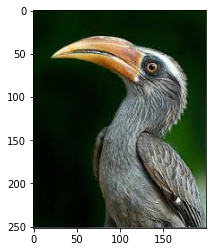

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [ ]:
import numpy as np

In [ ]:
img_array = np.array(img)
print("Image size", img_array.size)
print("Image shape", img_array.shape)

Image size 151200
Image shape (252, 200, 3)


In [ ]:
img_array

array([[[  5,  29,   3],
        [  5,  29,   3],
        [  4,  28,   2],
        ...,
        [  4,  40,   2],
        [  4,  40,   2],
        [  5,  41,   3]],

       [[  5,  29,   3],
        [  5,  29,   3],
        [  4,  28,   2],
        ...,
        [  4,  40,   2],
        [  4,  40,   2],
        [  4,  40,   2]],

       [[  4,  28,   2],
        [  4,  28,   2],
        [  4,  28,   2],
        ...,
        [  5,  39,   2],
        [  4,  40,   2],
        [  4,  40,   2]],

       ...,

       [[  8,  21,  11],
        [  8,  21,  11],
        [  7,  20,  10],
        ...,
        [155, 169, 172],
        [112, 130, 132],
        [176, 194, 196]],

       [[  0,  11,   1],
        [  0,  11,   1],
        [  0,  10,   0],
        ...,
        [195, 206, 208],
        [103, 117, 118],
        [180, 195, 198]],

       [[ 71,  84,  74],
        [ 71,  84,  74],
        [ 71,  83,  73],
        ...,
        [ 99, 109, 110],
        [ 77,  89,  89],
        [102, 116, 117]]

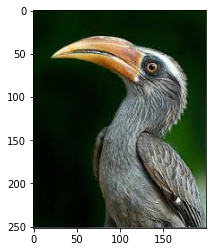

In [ ]:
data = Image.fromarray(img_array)
plt.imshow(data)

In [ ]:
img_array.shape

(252, 200, 3)

Initialize our ANN by creating an instance of Sequential. The Sequential function initializes a linear stack of layers which allows to add more layers later using the Dense module.


Adding input layers to ANN

  * First parameter is number of nodes in each layer.
  * Second parameter is activation function. Use rectifier function, shortened as relu.
  * Final parameter is input_shape, which take the image size



In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
'''
'''

* The first parameter is to get the optimal set of weights in the neural network. A very efficient one to use is adam.
* The second parameter is the loss function. Since we are taking single image as our output, we use the binary_crossentropy loss function. Otherwise we would have used categorical_crossentopy.
* The final argument is the criterion to evaluate the model. In this case we use the accuracy.

In [ ]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy']) 

Pass the image through the model to get the output

In [ ]:
print(img_array.shape)

(252, 200, 3)


In [ ]:
img = Image.open('/content/hornbill.jpg')
print(img.size)
img_array = np.array(img)
print("Image size", img_array.size)
print("Image shape", img_array.shape)
output = model.predict(img_array)
output.size, output.shape

(200, 252)
Image size 151200
Image shape (252, 200, 3)


ValueError: ignored

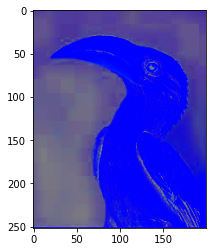

In [ ]:
plt.imshow(output)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
import cv2


model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(1, 1), input_shape=img_array.shape))
model.add(Activation('relu'))

model.add(Conv2D(filters = 64, kernel_size=(1, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 128, kernel_size=(1, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 500, kernel_size=(1, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters=3, kernel_size=(1, 1)))
model.add(Activation('sigmoid'))


arr = img_array.reshape((1, 252, 200,3)) #While using different image, give the shape accordingly
output2 = model.predict(arr)
output2.size, output2.shape

(151200, (1, 252, 200, 3))

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 200, 32)      128       
                                                                 
 activation (Activation)     (None, 252, 200, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 200, 64)      2112      
                                                                 
 activation_1 (Activation)   (None, 252, 200, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 252, 200, 128)     8320      
                                                                 
 activation_2 (Activation)   (None, 252, 200, 128)     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 252, 200, 500)    

In [ ]:
img_output2 = output2.reshape(252, 200,3)
img_output2.shape

(252, 200, 3)

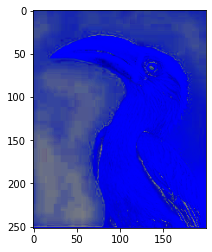

In [ ]:
plt.imshow(img_output2)